In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
covid_19_df = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
covid_19_df['Date'] = pd.to_datetime(covid_19_df['Date'])
covid_19_df['Country/Region'] = covid_19_df['Country/Region'].replace('Mainland China', 'China')
covid_19_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
16869,Sint Maarten,Netherlands,18.0425,-63.0548,2020-03-20,1,0,0
16870,NaN,Niger,17.6078,8.0817,2020-03-20,1,0,0
16871,NaN,Papua New Guinea,-6.3150,143.9555,2020-03-20,1,0,0
16872,Isle of Man,United Kingdom,54.2361,-4.5481,2020-03-20,1,0,0
16873,NaN,Zimbabwe,-20.0000,30.0000,2020-03-20,1,0,0


In [3]:
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
covid_19_df['Active'] = covid_19_df['Confirmed'] - covid_19_df['Deaths'] - covid_19_df['Recovered']
covid_19_df = covid_19_df.sort_values(by=['Date'], ascending=True)
covid_19_df.head(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Thailand,15.0000,101.00,2020-01-22,2,0,0,2
194,Macau,China,22.1667,113.55,2020-01-22,1,0,0,1


### Finding Countries with most confirmed cases

In [4]:
last_covid_df = covid_19_df[covid_19_df['Date'] == covid_19_df['Date'].max()].reset_index(drop=True)
last_covid_df = last_covid_df.drop(columns=['Lat', 'Long'])
top_50 = last_covid_df.groupby('Country/Region').sum().sort_values(by='Confirmed', ascending=False).head(50)
top_50.head(2)

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
China,81250,3253,71266,6731
Italy,47021,4032,4440,38549


In [22]:
def prepare_data(func):
    def inside(df, country, *lower_bound):
#         date_range2 = df['Date'].sort_values().drop_duplicates().dt.strftime('%d.%m').reset_index(drop=True)
        df = df[df['Country/Region'] == country]
        if (country == 'China') | (country == 'US') | (country == 'Australia') | (country == 'Canada'):
            df = df.groupby('Date').sum().reset_index()
        elif df[df['Province/State'] == country].notna().any().any():
            df = df[df['Province/State'] == country]
        df = df.sort_values(by='Date').reset_index(drop=True)
        
        if lower_bound:
            df = df[df.Confirmed > lower_bound].reset_index()
        date_range = df['Date'].sort_values().drop_duplicates().dt.strftime('%d.%m').reset_index(drop=True)
        func(df, country, date_range)
    return inside

In [23]:
@prepare_data
def show_increment(df, label, date_range, *lower_bound):
    my_xticks = range(0, len(date_range), 5)
#     l_date_range = list(date_range)
    my_xticks_labels = list(date_range)[0:len(date_range):5]
    
    fig, ax = plt.subplots(figsize=(14, 5))
    ax = sns.lineplot(data=df[cases], ax=ax)
    ax.set_xticks(my_xticks)
    ax.set_xticklabels(my_xticks_labels)
    ax.set_xlabel(label)
    plt.show()

### Plots for 50 countries with most confirmed cases with start data: 50 confirmed cases

1 . China
Confirmed: 81250 
Active: 6731 
Recovered: 71266 
Deaths: 3253


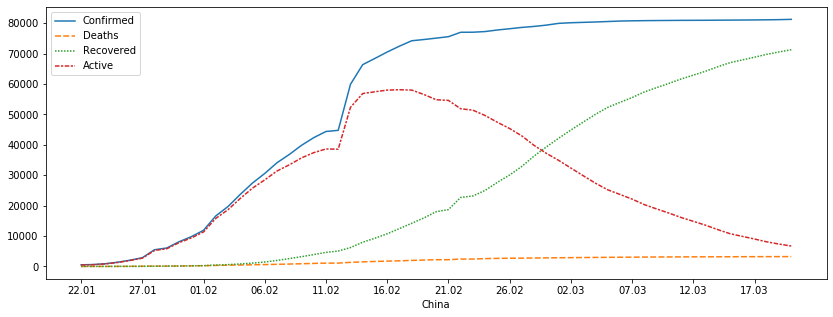

2 . Italy
Confirmed: 47021 
Active: 38549 
Recovered: 4440 
Deaths: 4032


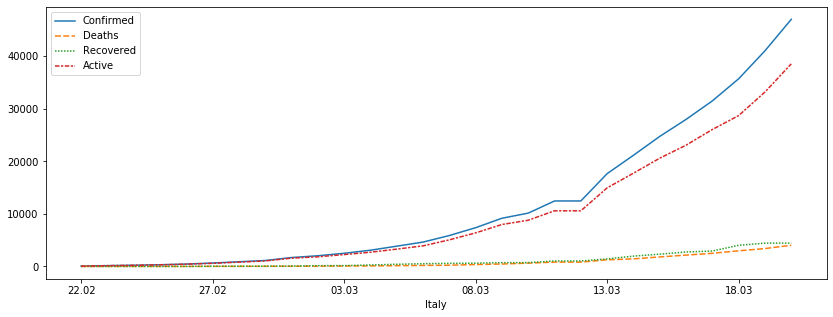

3 . Spain
Confirmed: 20410 
Active: 17779 
Recovered: 1588 
Deaths: 1043


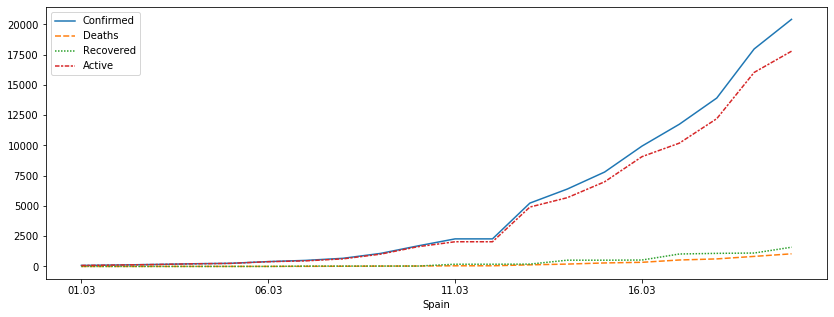

4 . Germany
Confirmed: 19848 
Active: 19601 
Recovered: 180 
Deaths: 67


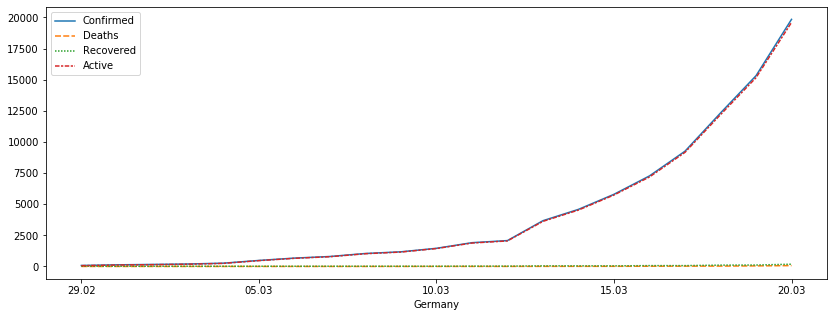

5 . Iran
Confirmed: 19644 
Active: 11466 
Recovered: 6745 
Deaths: 1433


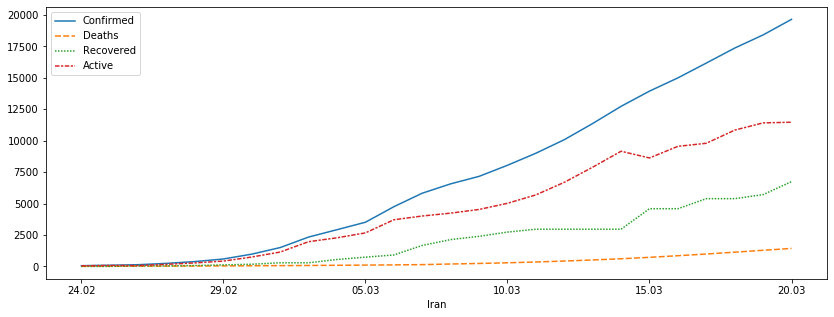

6 . US
Confirmed: 19100 
Active: 18856 
Recovered: 0 
Deaths: 244


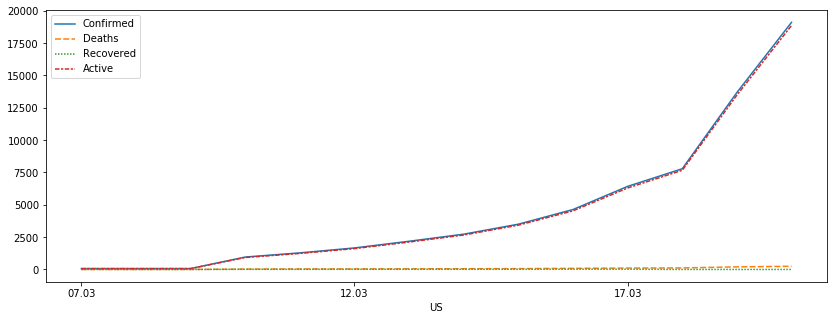

7 . France
Confirmed: 12726 
Active: 12264 
Recovered: 12 
Deaths: 450


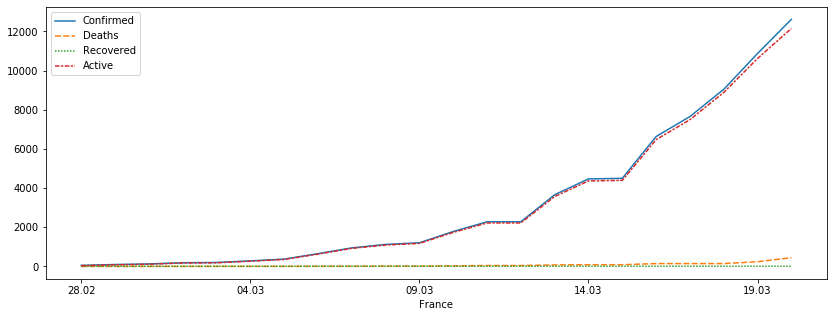

8 . Korea, South
Confirmed: 8652 
Active: 7018 
Recovered: 1540 
Deaths: 94


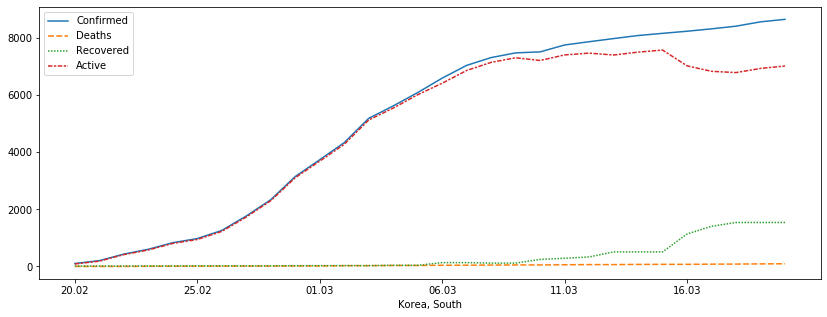

9 . Switzerland
Confirmed: 5294 
Active: 5225 
Recovered: 15 
Deaths: 54


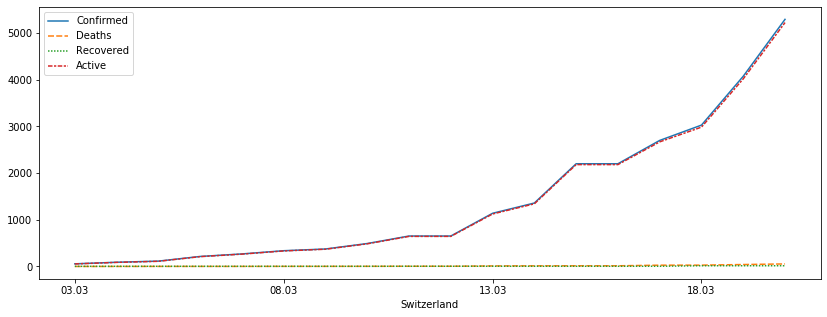

10 . United Kingdom
Confirmed: 4014 
Active: 3769 
Recovered: 67 
Deaths: 178


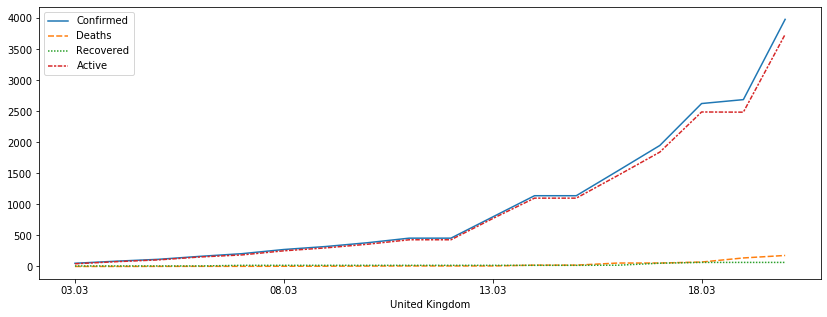

11 . Netherlands
Confirmed: 3003 
Active: 2894 
Recovered: 2 
Deaths: 107


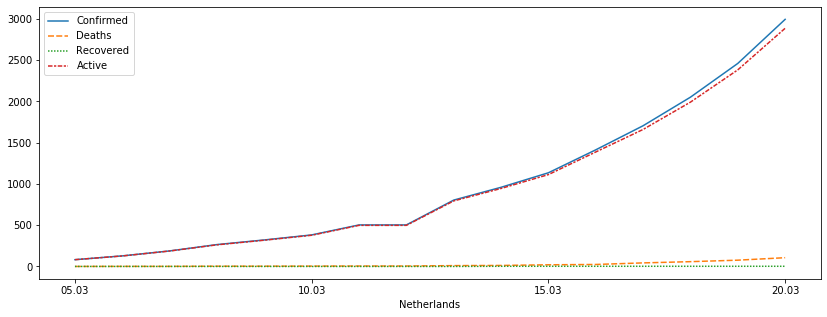

12 . Austria
Confirmed: 2388 
Active: 2373 
Recovered: 9 
Deaths: 6


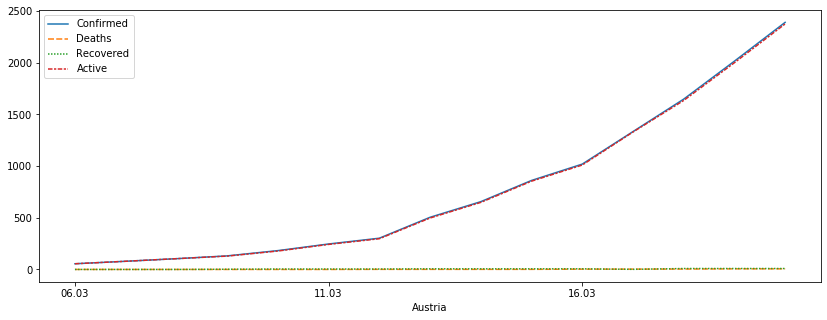

13 . Belgium
Confirmed: 2257 
Active: 2219 
Recovered: 1 
Deaths: 37


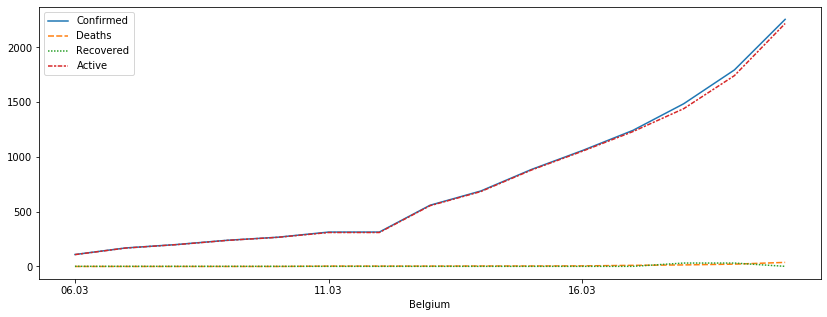

14 . Norway
Confirmed: 1914 
Active: 1906 
Recovered: 1 
Deaths: 7


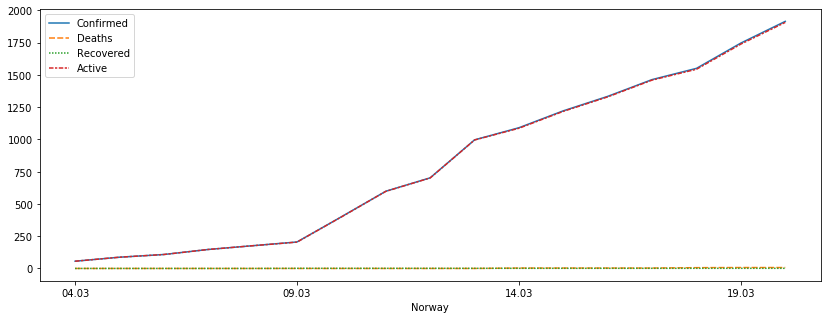

15 . Sweden
Confirmed: 1639 
Active: 1607 
Recovered: 16 
Deaths: 16


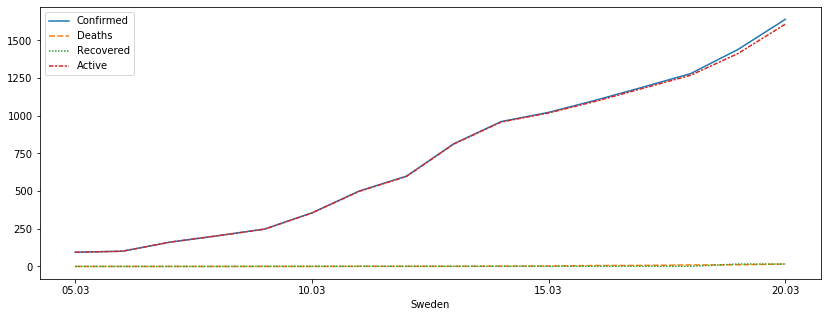

16 . Denmark
Confirmed: 1337 
Active: 1327 
Recovered: 1 
Deaths: 9


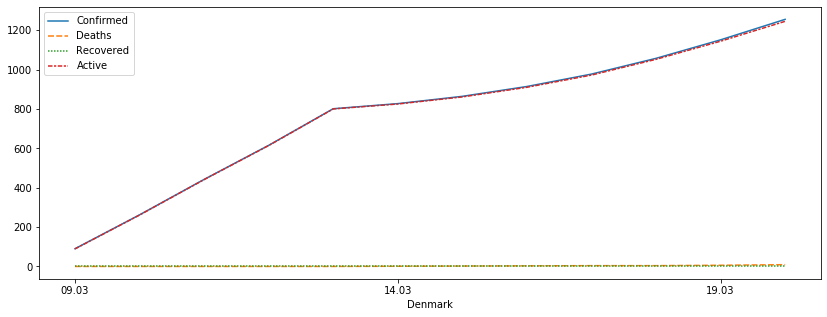

17 . Malaysia
Confirmed: 1030 
Active: 940 
Recovered: 87 
Deaths: 3


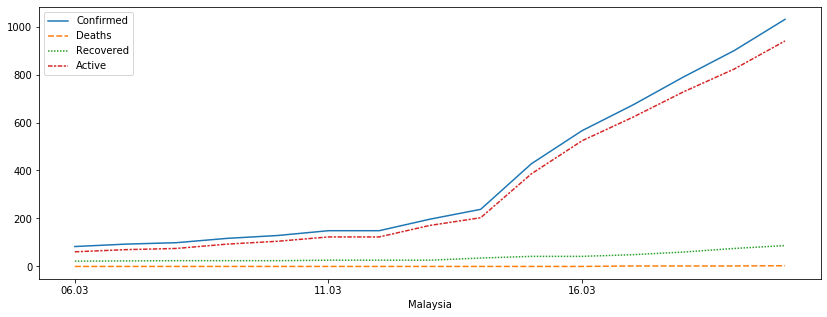

18 . Portugal
Confirmed: 1020 
Active: 1009 
Recovered: 5 
Deaths: 6


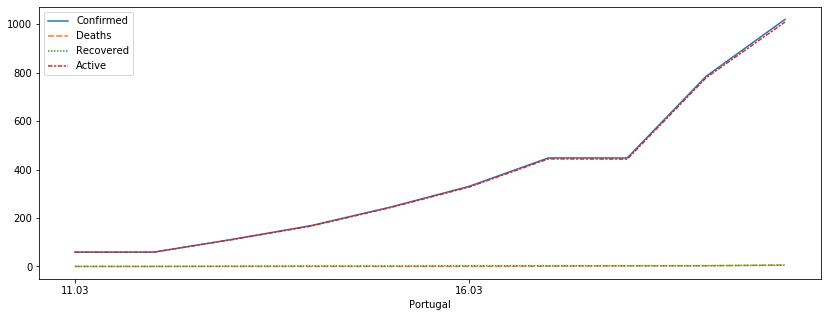

19 . Japan
Confirmed: 963 
Active: 739 
Recovered: 191 
Deaths: 33


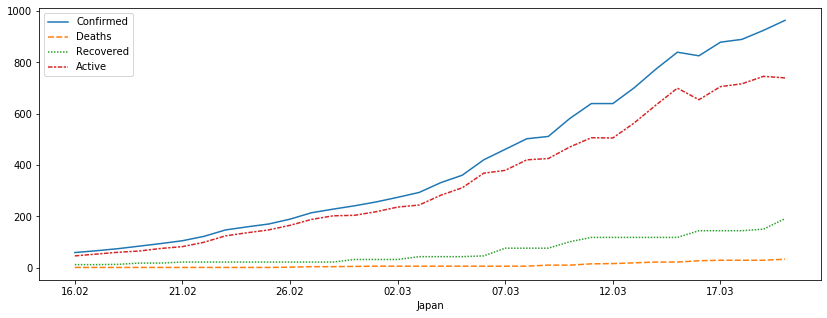

20 . Canada
Confirmed: 943 
Active: 922 
Recovered: 9 
Deaths: 12


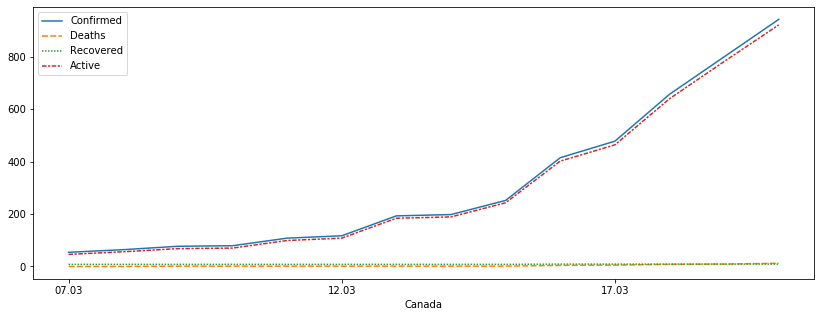

21 . Czechia
Confirmed: 833 
Active: 829 
Recovered: 4 
Deaths: 0


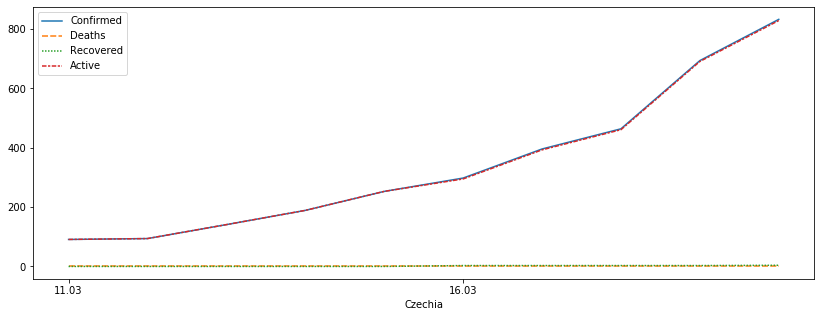

22 . Brazil
Confirmed: 793 
Active: 780 
Recovered: 2 
Deaths: 11


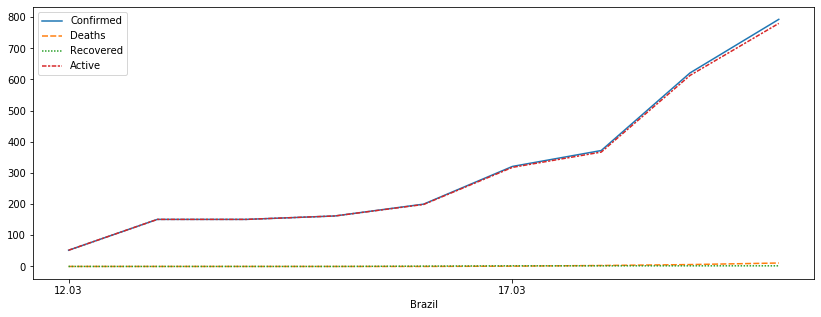

23 . Australia
Confirmed: 791 
Active: 758 
Recovered: 26 
Deaths: 7


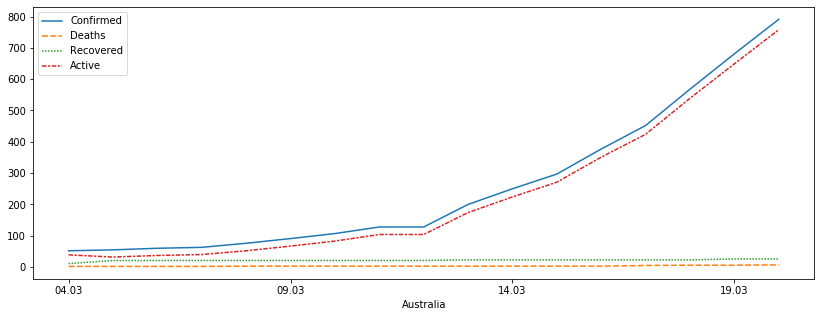

24 . Cruise Ship
Confirmed: 712 
Active: 380 
Recovered: 325 
Deaths: 7


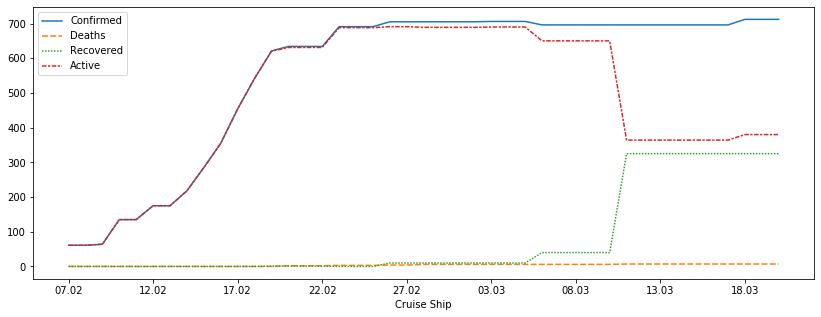

25 . Israel
Confirmed: 705 
Active: 691 
Recovered: 14 
Deaths: 0


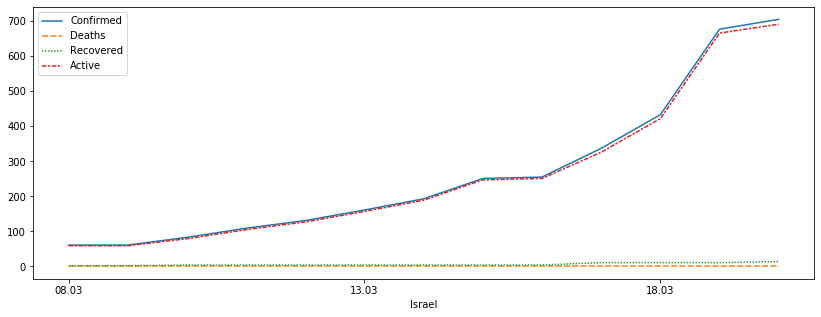

26 . Ireland
Confirmed: 683 
Active: 675 
Recovered: 5 
Deaths: 3


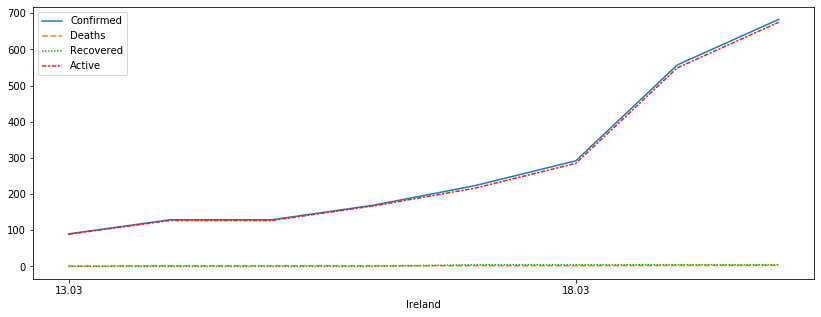

27 . Pakistan
Confirmed: 501 
Active: 485 
Recovered: 13 
Deaths: 3


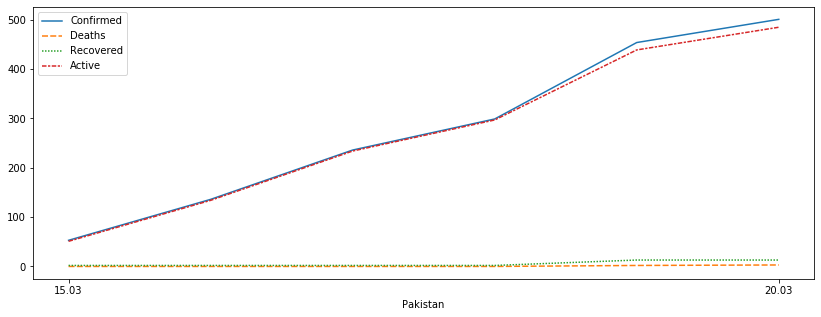

28 . Greece
Confirmed: 495 
Active: 470 
Recovered: 19 
Deaths: 6


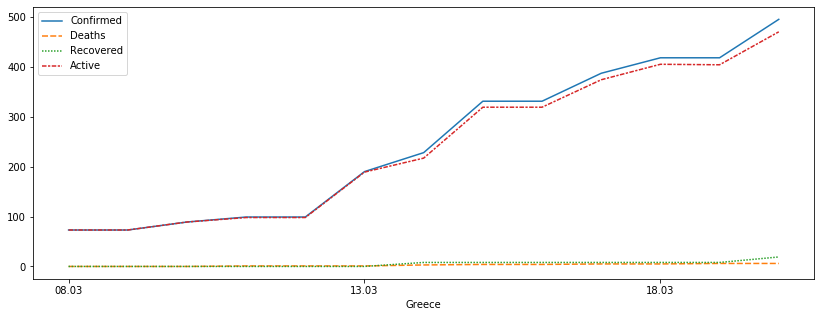

29 . Luxembourg
Confirmed: 484 
Active: 480 
Recovered: 0 
Deaths: 4


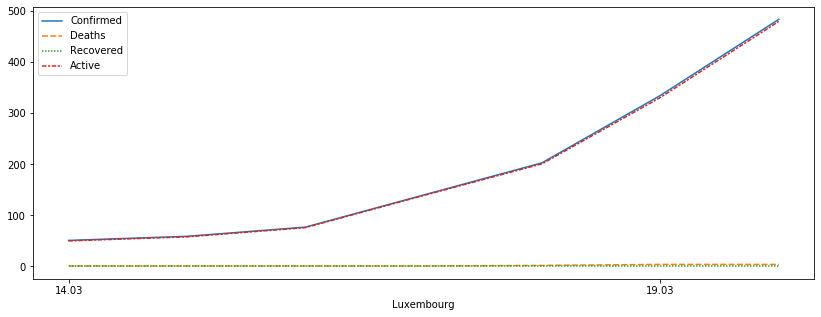

30 . Qatar
Confirmed: 470 
Active: 460 
Recovered: 10 
Deaths: 0


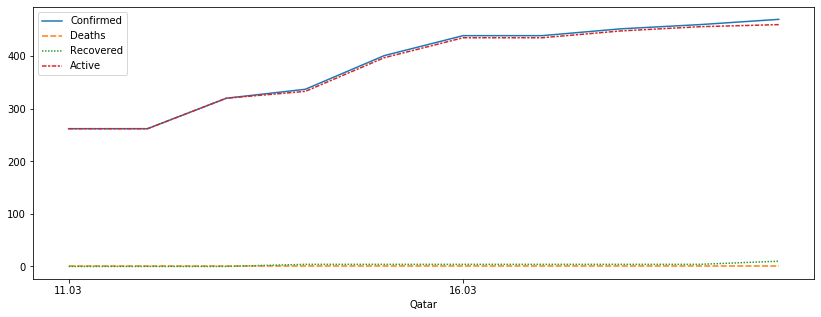

31 . Finland
Confirmed: 450 
Active: 440 
Recovered: 10 
Deaths: 0


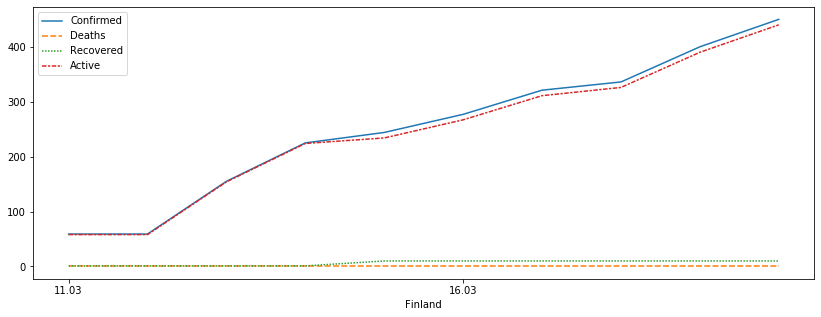

32 . Chile
Confirmed: 434 
Active: 428 
Recovered: 6 
Deaths: 0


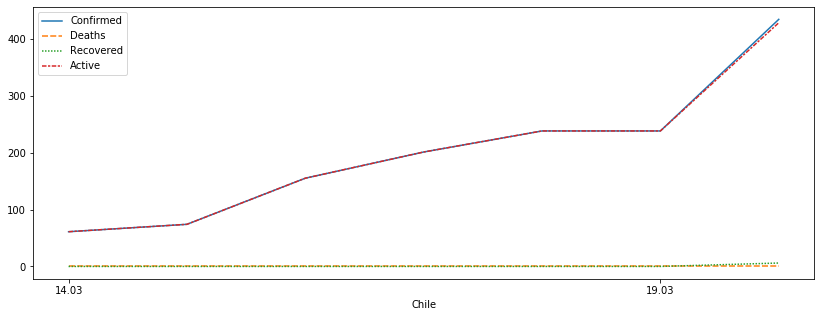

33 . Poland
Confirmed: 425 
Active: 419 
Recovered: 1 
Deaths: 5


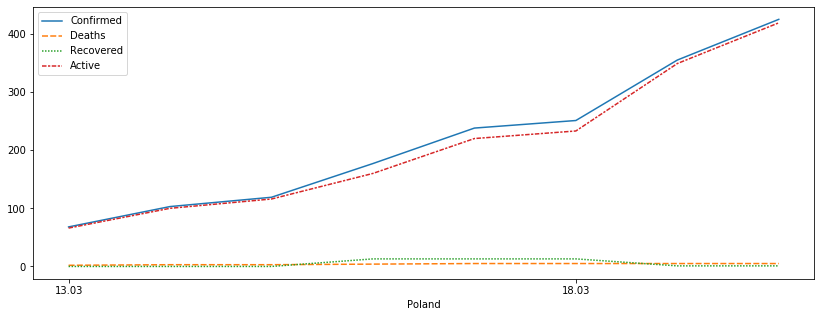

34 . Iceland
Confirmed: 409 
Active: 404 
Recovered: 5 
Deaths: 0


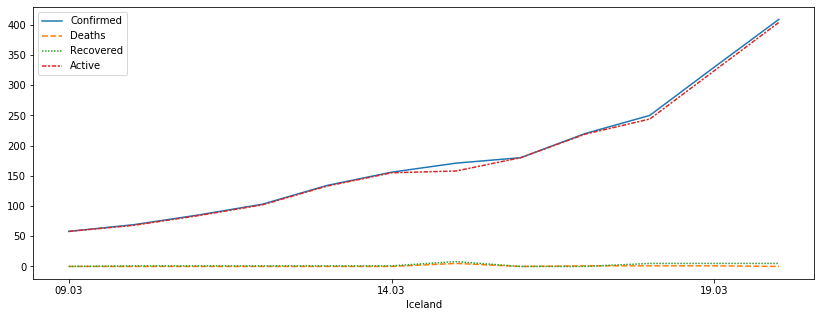

35 . Singapore
Confirmed: 385 
Active: 261 
Recovered: 124 
Deaths: 0


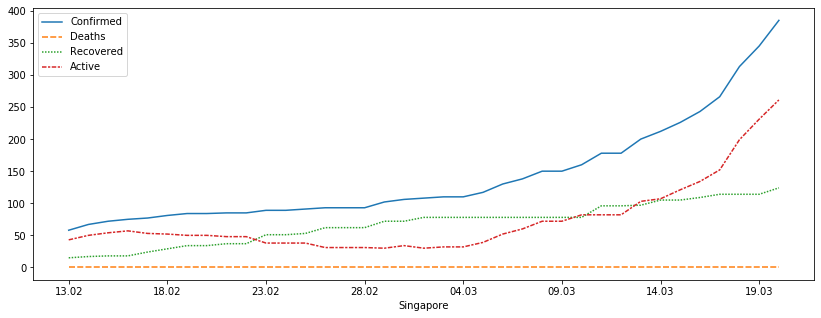

36 . Indonesia
Confirmed: 369 
Active: 322 
Recovered: 15 
Deaths: 32


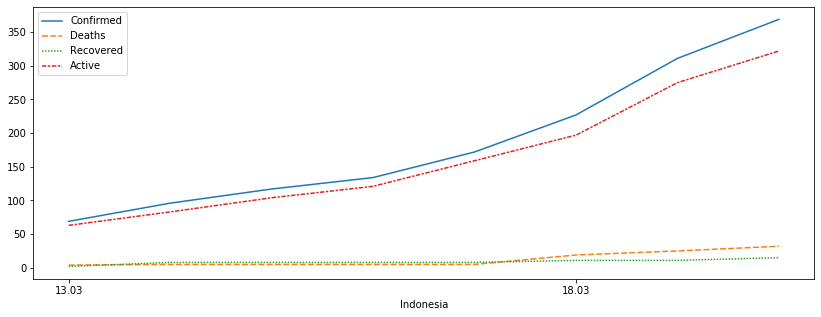

37 . Ecuador
Confirmed: 367 
Active: 362 
Recovered: 0 
Deaths: 5


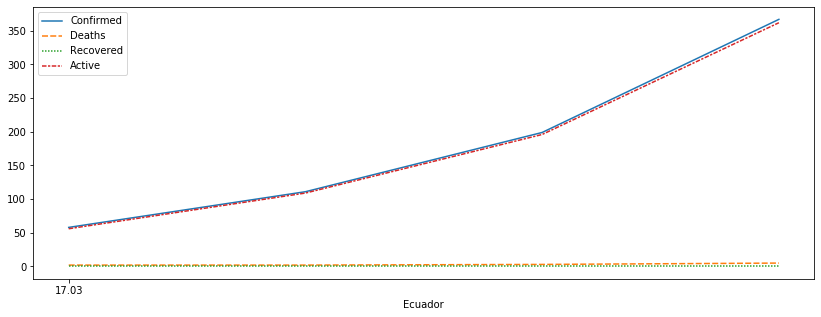

38 . Turkey
Confirmed: 359 
Active: 355 
Recovered: 0 
Deaths: 4


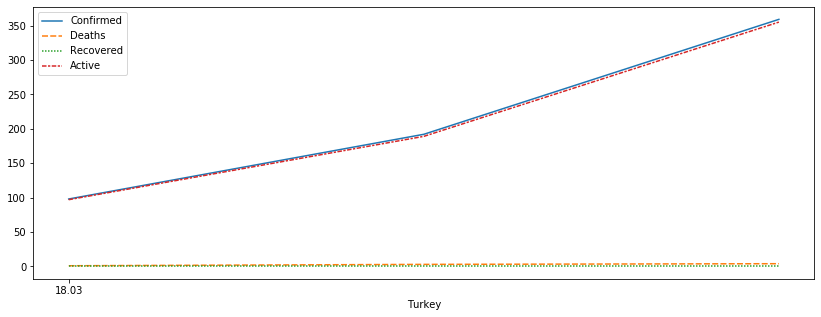

39 . Saudi Arabia
Confirmed: 344 
Active: 336 
Recovered: 8 
Deaths: 0


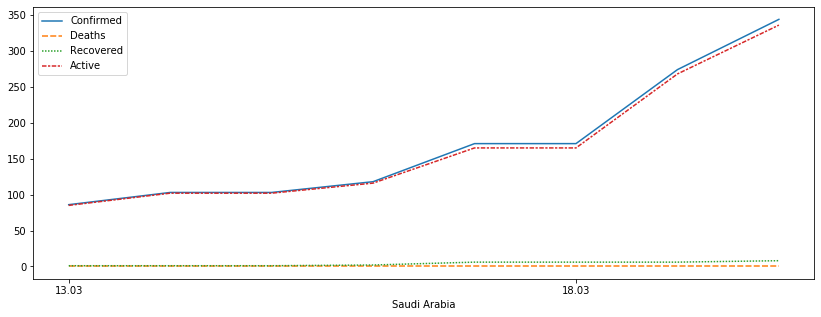

40 . Slovenia
Confirmed: 341 
Active: 340 
Recovered: 0 
Deaths: 1


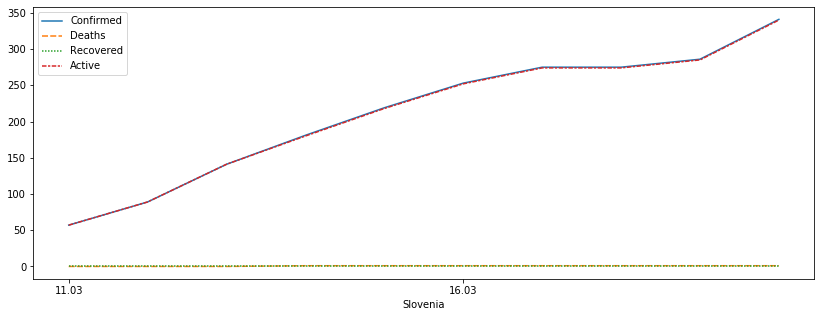

41 . Thailand
Confirmed: 322 
Active: 279 
Recovered: 42 
Deaths: 1


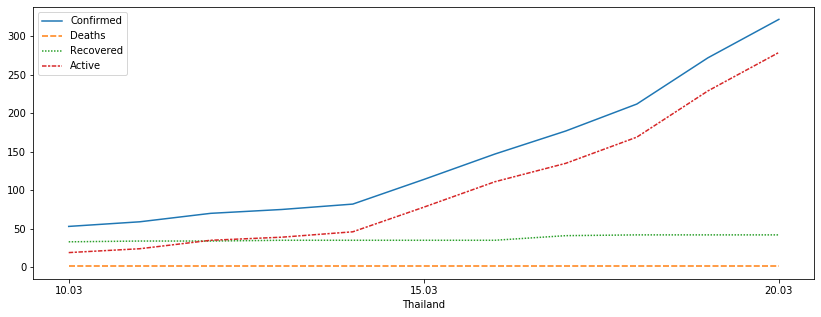

42 . Romania
Confirmed: 308 
Active: 283 
Recovered: 25 
Deaths: 0


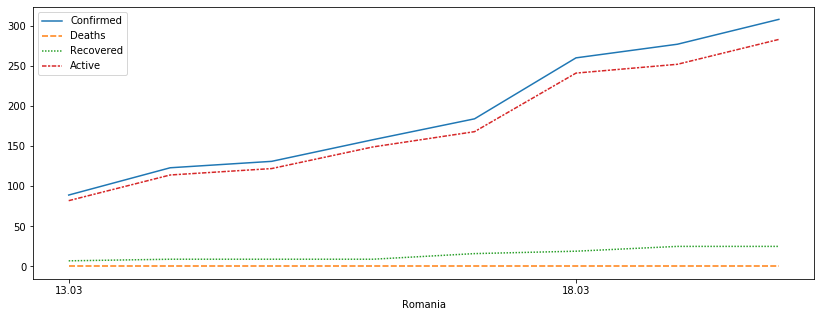

43 . Bahrain
Confirmed: 285 
Active: 184 
Recovered: 100 
Deaths: 1


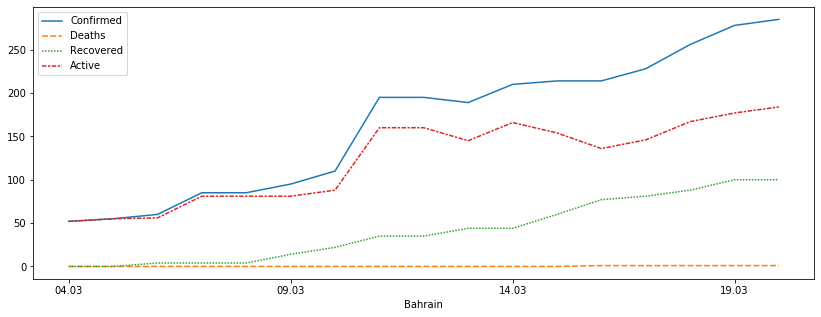

44 . Egypt
Confirmed: 285 
Active: 238 
Recovered: 39 
Deaths: 8


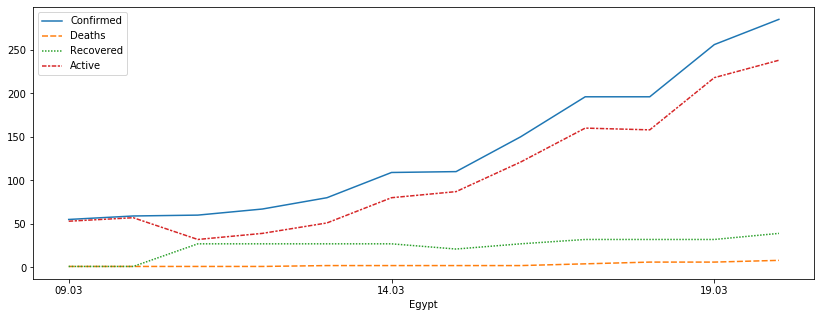

45 . Estonia
Confirmed: 283 
Active: 282 
Recovered: 1 
Deaths: 0


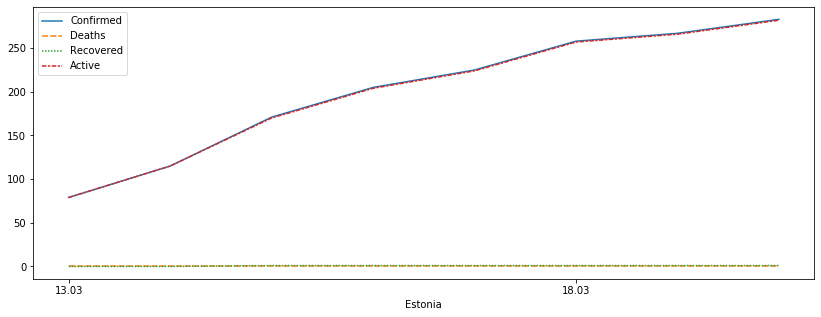

46 . Russia
Confirmed: 253 
Active: 243 
Recovered: 9 
Deaths: 1


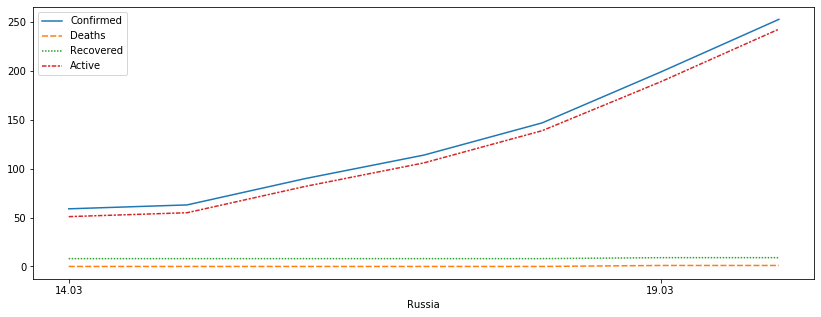

47 . India
Confirmed: 244 
Active: 219 
Recovered: 20 
Deaths: 5


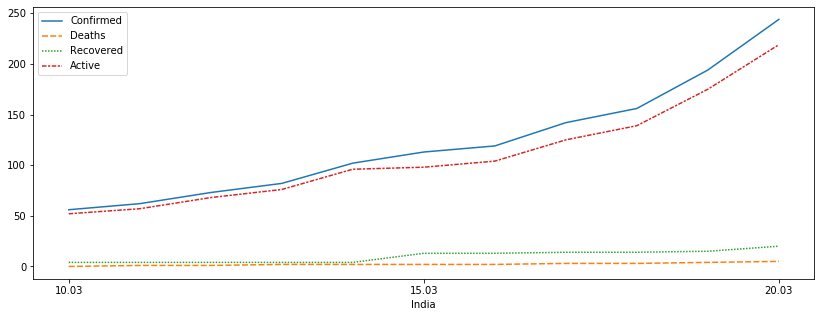

48 . Peru
Confirmed: 234 
Active: 230 
Recovered: 1 
Deaths: 3


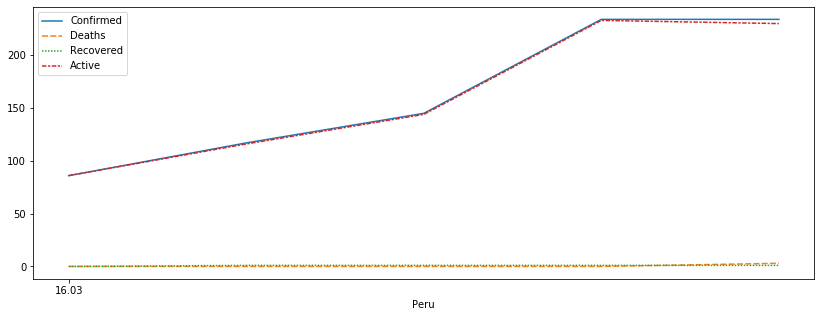

49 . Philippines
Confirmed: 230 
Active: 204 
Recovered: 8 
Deaths: 18


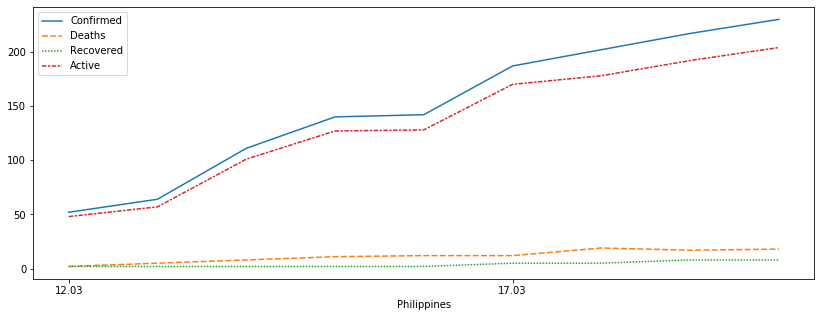

50 . Iraq
Confirmed: 208 
Active: 142 
Recovered: 49 
Deaths: 17


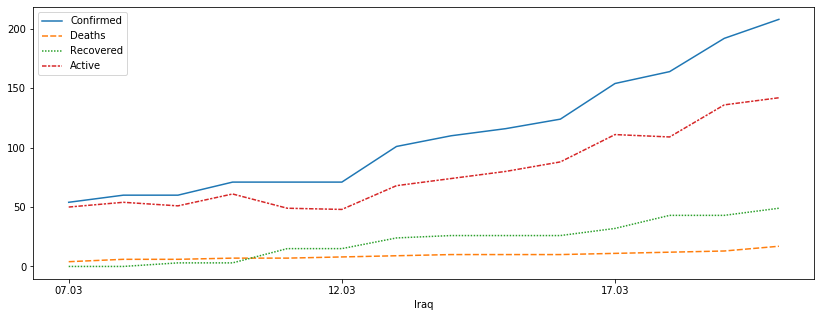

In [24]:
for index, country in enumerate(top_50.index):
    print(index+1,'.', country)
    print('Confirmed:', top_50.Confirmed[country],'\n'\
          'Active:', top_50.Active[country],'\n'\
          'Recovered:', top_50.Recovered[country],'\n'\
          'Deaths:', top_50.Deaths[country]
         )
    show_increment(covid_19_df, country, 50)